# Data Description
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300153 datapoints and 11 features in the cleaned dataset.

## Feature:
* Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
* Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
* Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
* Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
* Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
* Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
* Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

### Target Column
* Price: Target variable stores information of the ticket price.

Source of Dataset: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

# Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Ingestion

In [80]:
df = pd.read_csv("data/Flight_Price.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data Cleaning and Preparation

In [81]:
# drop unnamed column as its not of any use 
df.drop("Unnamed: 0", axis=1, inplace=True)

In [82]:
# Get shape of df 
df.shape

(300153, 11)

**Findings:** Dataset contains 12 columns and 300153 rows

In [83]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

**Findings:** In the dataset, there are 3 Numerical variables out of which one is the target variable `price`, and remaining are categorical variables.

In [84]:
# Check if there are any null values
df.isnull().sum()

# There are no null values in the dataset

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**Findings:** There are no null valus

## Descraptive Statestics of the numerical variable

In [85]:
# seperate numerical and categorical column
categorical_col = df.columns[df.dtypes == 'object']
print("categorical Columns: ",categorical_col)

numerical_col = df.columns[df.dtypes != 'object']
print("Numerical Columns: ",numerical_col)

# check unique values for all categorical column
for i in categorical_col:
    print("\nColumn Name: ", i)
    print(df[i].unique())

categorical Columns:  Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')
Numerical Columns:  Index(['duration', 'days_left', 'price'], dtype='object')

Column Name:  airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Column Name:  flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']

Column Name:  source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Column Name:  departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Column Name:  stops
['zero' 'one' 'two_or_more']

Column Name:  arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Column Name:  destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Column Name:  class
['Economy' 'Business']


In [86]:
# describe categorical data 
df[categorical_col].describe()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [87]:
df[df.flight == "UK-706"]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
216,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,2,15038
378,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,3,19238
462,Vistara,UK-706,Delhi,Afternoon,one,Morning,Mumbai,Economy,21.83,4,9000
484,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,4,10575
637,Vistara,UK-706,Delhi,Afternoon,one,Morning,Mumbai,Economy,21.83,5,9000
...,...,...,...,...,...,...,...,...,...,...,...
274689,Vistara,UK-706,Kolkata,Morning,one,Night,Chennai,Business,12.50,48,55983
274694,Vistara,UK-706,Kolkata,Morning,one,Morning,Chennai,Business,23.67,48,55983
274730,Vistara,UK-706,Kolkata,Morning,one,Night,Chennai,Business,10.00,49,55983
274731,Vistara,UK-706,Kolkata,Morning,one,Night,Chennai,Business,12.50,49,55983


In [88]:
# check for duplicate records
df.duplicated().sum()

0

**Findings:** There are no duplicate records in the data.

In [89]:
# describe numerical column
df[numerical_col].describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


**Findings:** The minimum price for the flight ticket is 1105 and maximum price ticket us 123071

In [90]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [91]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [92]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# EDA

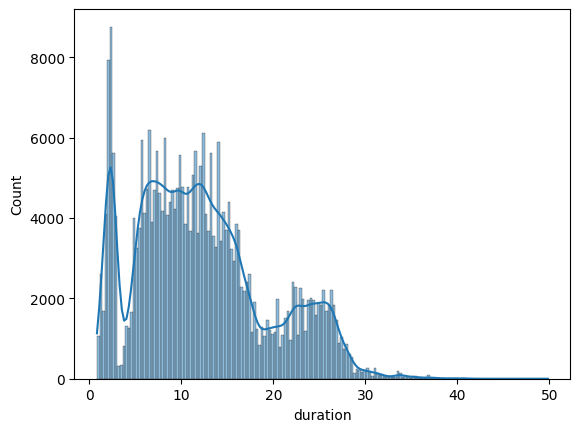

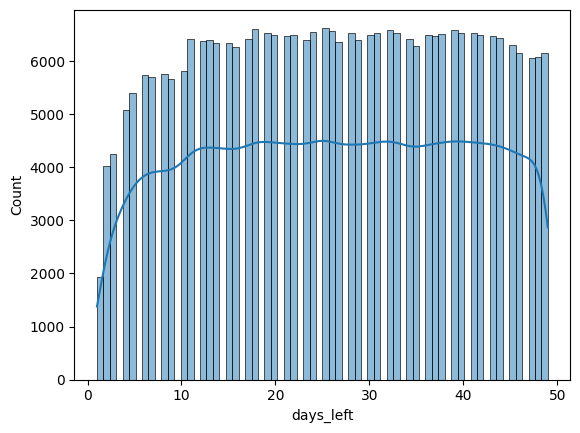

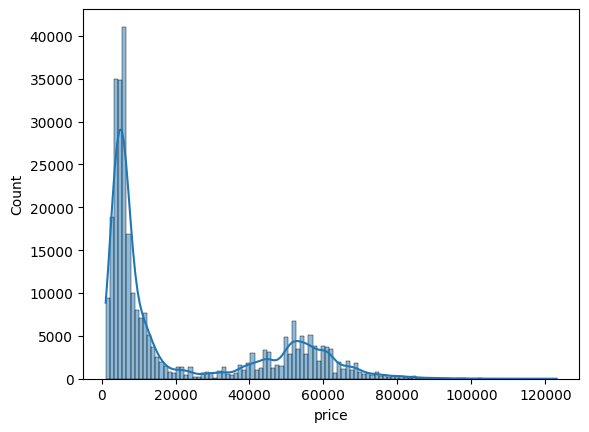

In [93]:
# Visualize numerical column
for col in numerical_col:
    sns.histplot(df, x=col, kde=True)
    print('\n')
    plt.show()

In [94]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<Axes: >

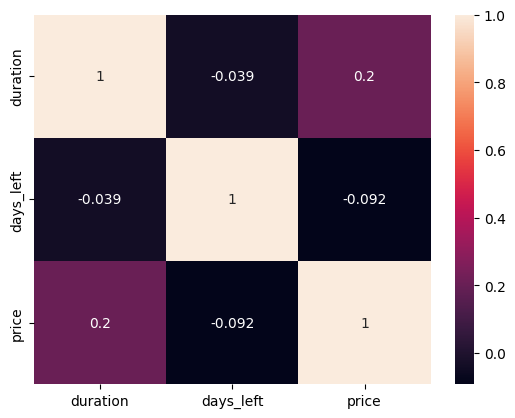

In [95]:
# Get the heatmap
sns.heatmap(df[numerical_col].corr(), annot=True)

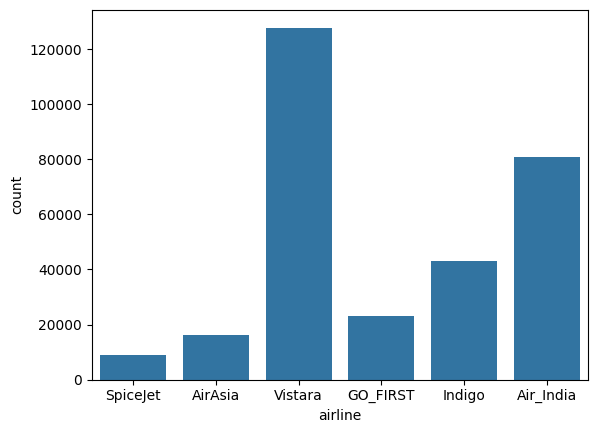

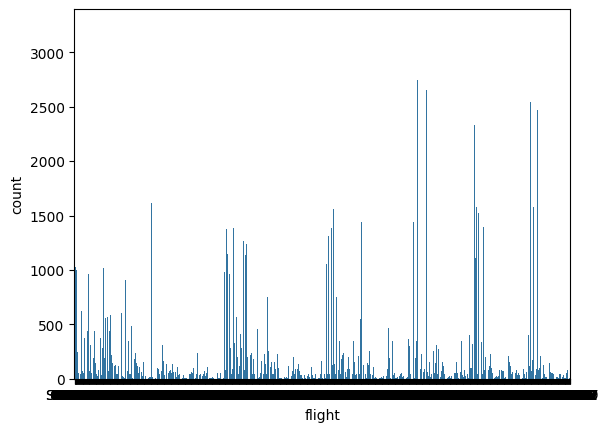

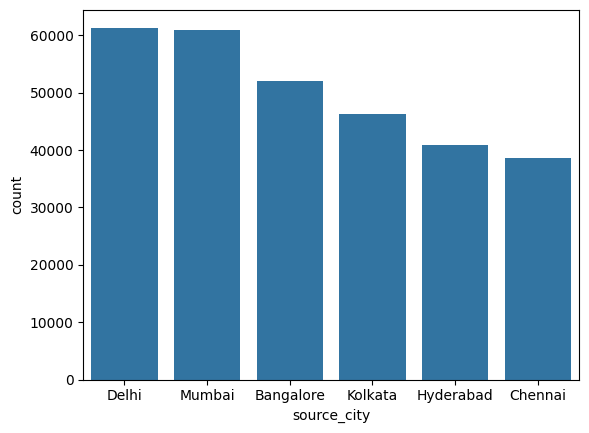

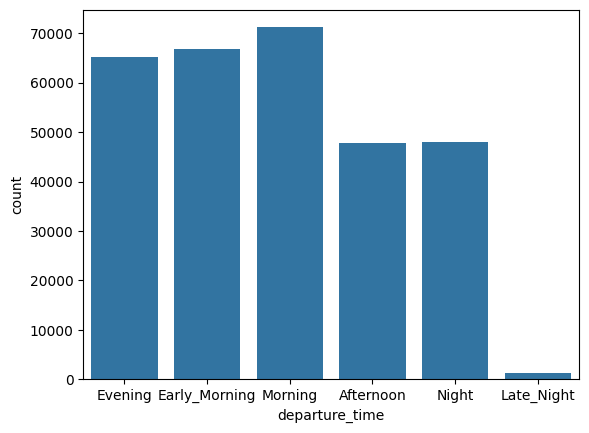

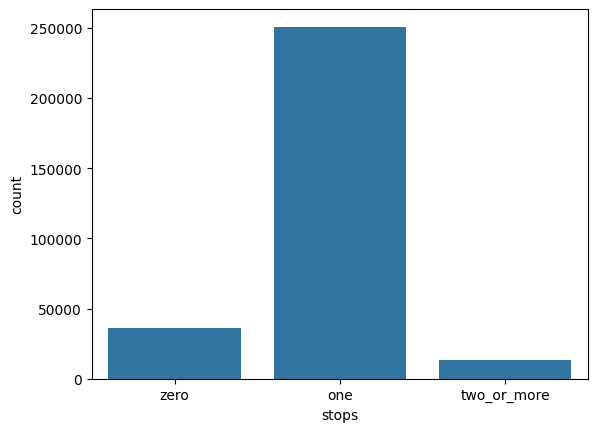

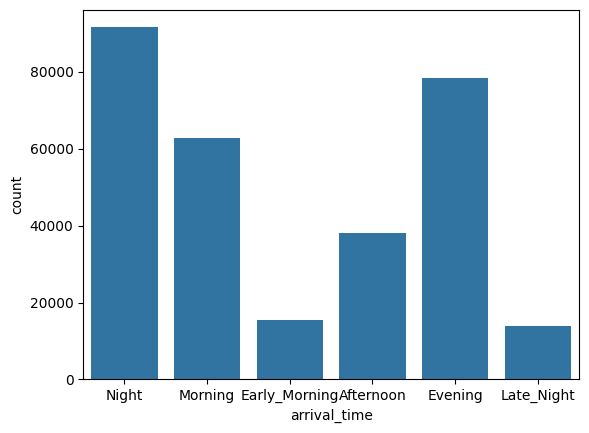

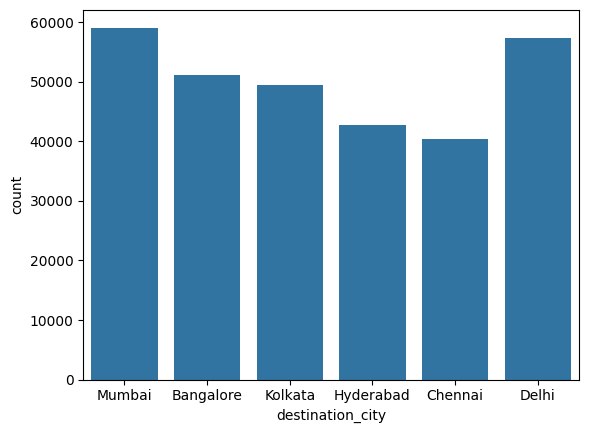

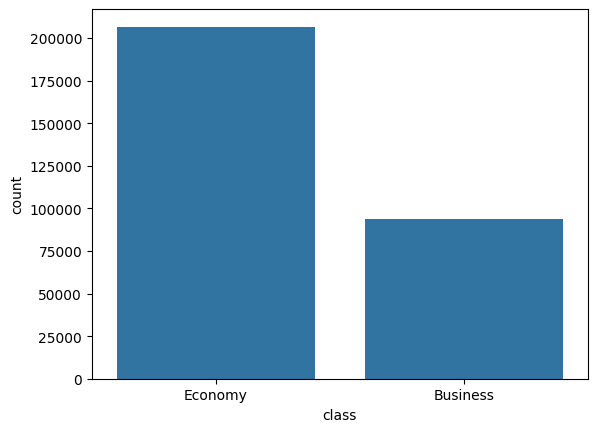

In [96]:
# visualize categorical columns
for col in categorical_col:
    sns.countplot(x = df[col])
    print('\n')
    plt.show()

## Analyse the following questions be means of Data Visualization

### Q1: How does the ticket price varies with the type of airline?

#### Findings:
* Among the airlines that provides Economi class tickets, Air India and Vistara is having the most expensive flight tickets, whereas AirAsia provides the most affordable fares. 
* Specifically, in the context of Business class, Vistara's prices are higher then AirAsia.

<Axes: title={'center': 'Airline price based on companies for Business tickets'}, xlabel='airline', ylabel='price'>

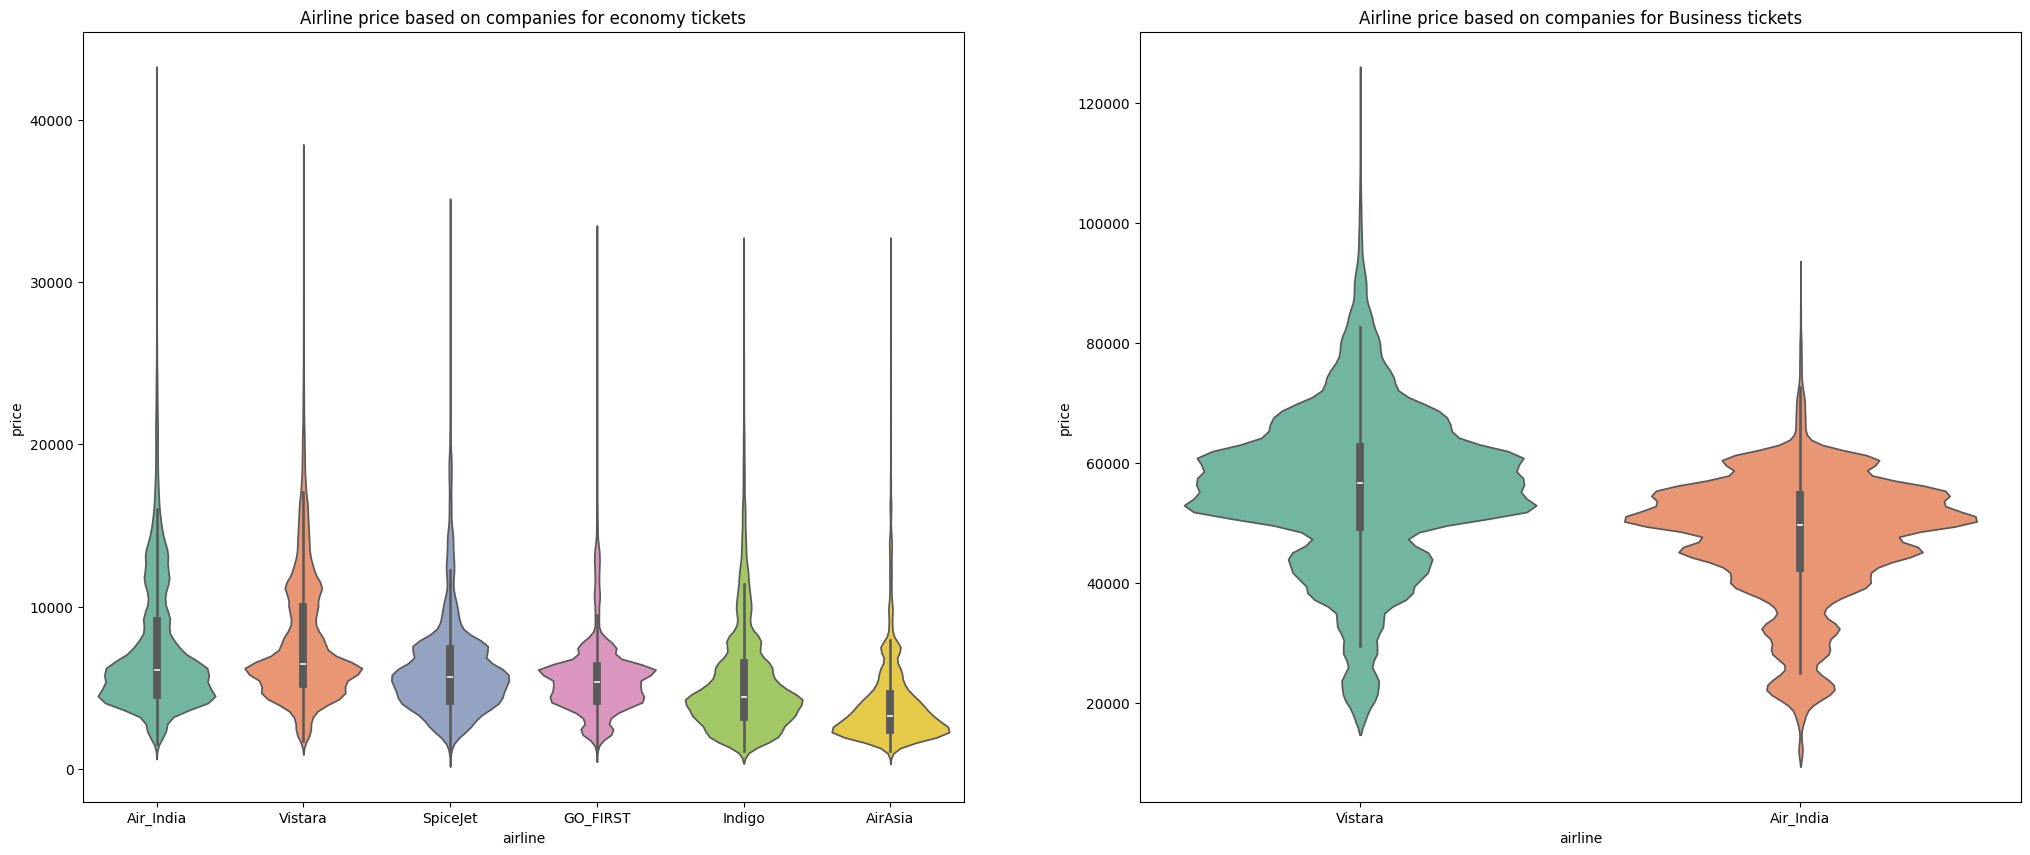

In [97]:
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
plt.title("Airline price based on companies for economy tickets")
sns.violinplot(x = 'airline', 
               y = 'price',
               hue = 'airline',
               data = df[df['class']== "Economy"].sort_values("price", ascending=False),
               palette = "Set2"
               )

plt.subplot(1,2,2)
plt.title("Airline price based on companies for Business tickets")
sns.violinplot(x = "airline",
               y = 'price',
               hue = 'airline',
               data = df[df['class'] == "Business"].sort_values("price", ascending=False),
               palette='Set2')

### Q2: How does the ticket price affected when tickets are bought in 1 or 2 days before departure?

#### Findings:
* The Graph illustsrate a gradual increase in price until 20 days before the flight, followed by a significant drop in price just one day prior. resulting in price 3 time cheaper.
* This pattern may suggest that the airline may reduce ticket price close to depature date to fill empty seats and ensure high occurance on their plain.

<Axes: xlabel='days_left', ylabel='price'>

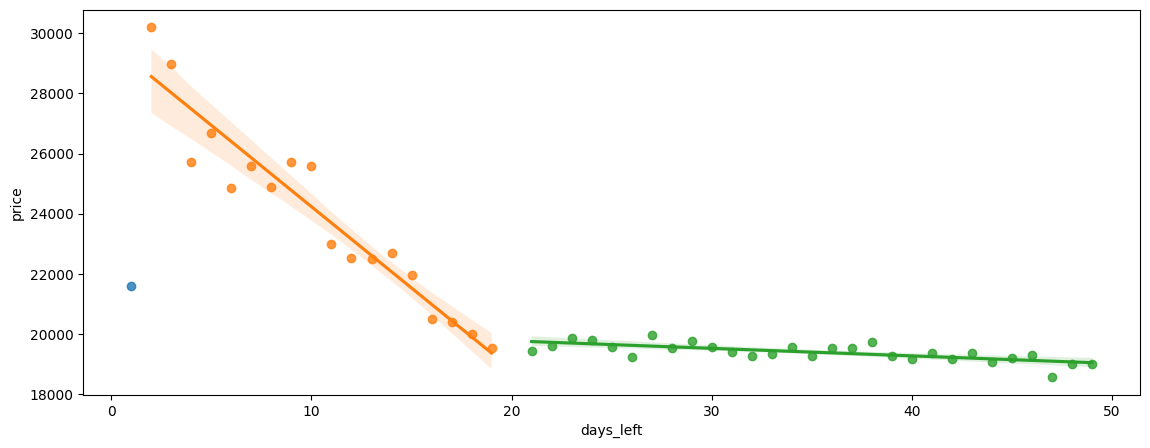

In [98]:
mean_df = df.groupby(df['days_left'])['price'].mean().reset_index()

# mean_df[mean_df["days_left"] == 1]


plt.figure(figsize=(30, 5))

plt.subplot(1,2,1)
sns.regplot(x = "days_left",
            y = "price",
            data = mean_df[mean_df["days_left"] == 1],
            fit_reg=False
            )

sns.regplot(x = "days_left",
            y = "price",
            data = mean_df[(mean_df["days_left"] > 1) & (mean_df["days_left"] < 20)])

sns.regplot(x = "days_left",
            y = "price",
            data = mean_df[mean_df["days_left"] > 20]
            )

### Q3: How does the ticket price change based on the Departure Time and Arrival Time?

In [99]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<Axes: title={'center': 'Airline Price based on Arival Time'}, xlabel='arrival_time', ylabel='price'>

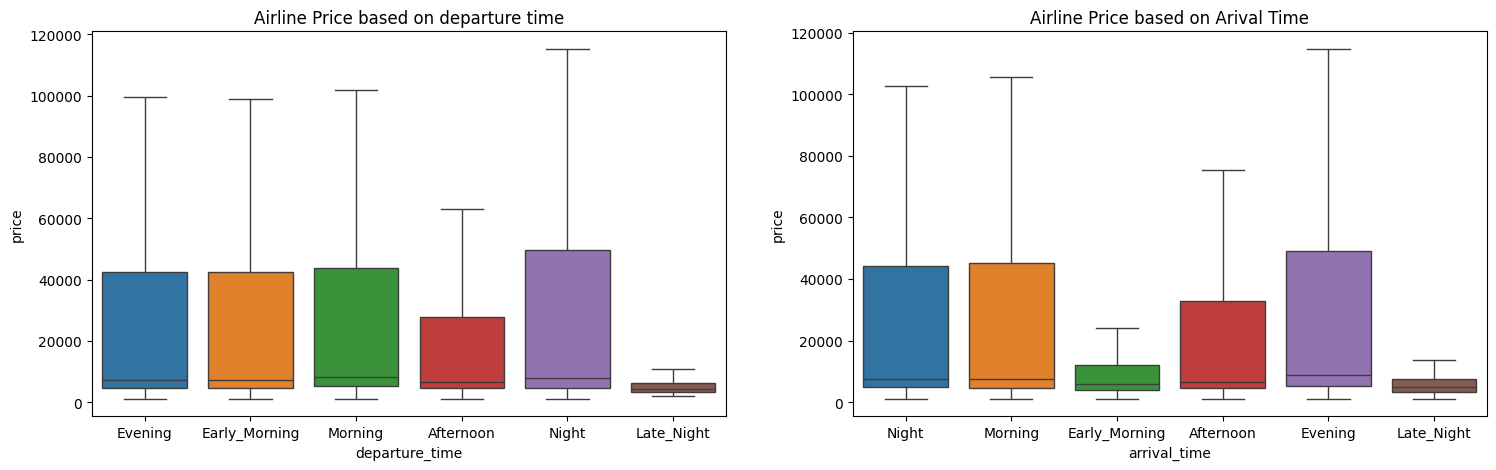

In [100]:
plt.figure(figsize=(18, 5))

plt.subplot(1,2,1)
plt.title("Airline Price based on departure time")
sns.boxplot(x = 'departure_time',
            y = 'price',
            data = df,
            hue="departure_time",
            showfliers = False      # setting this parameter to False, will not show outliers in the diagram
            )

plt.subplot(1,2,2)
plt.title("Airline Price based on Arival Time")
sns.boxplot(x = "arrival_time",
            y = "price",
            data = df,
            hue = "arrival_time",
            showfliers = False  # setting this parameter to False, will not show outliers in the diagram
            )

**Findings:** 
* The box plot indicates that travelling Late night, both departing and arriving, is the most cost effective option.
* Additionaly, early morning flights are also bidget-friendly.
* While afternoon flight comes at a slightly lower price compared to evening, morning, and night flight.

### Q4: How Does the ticket price changes with change in Source City and Destination City

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

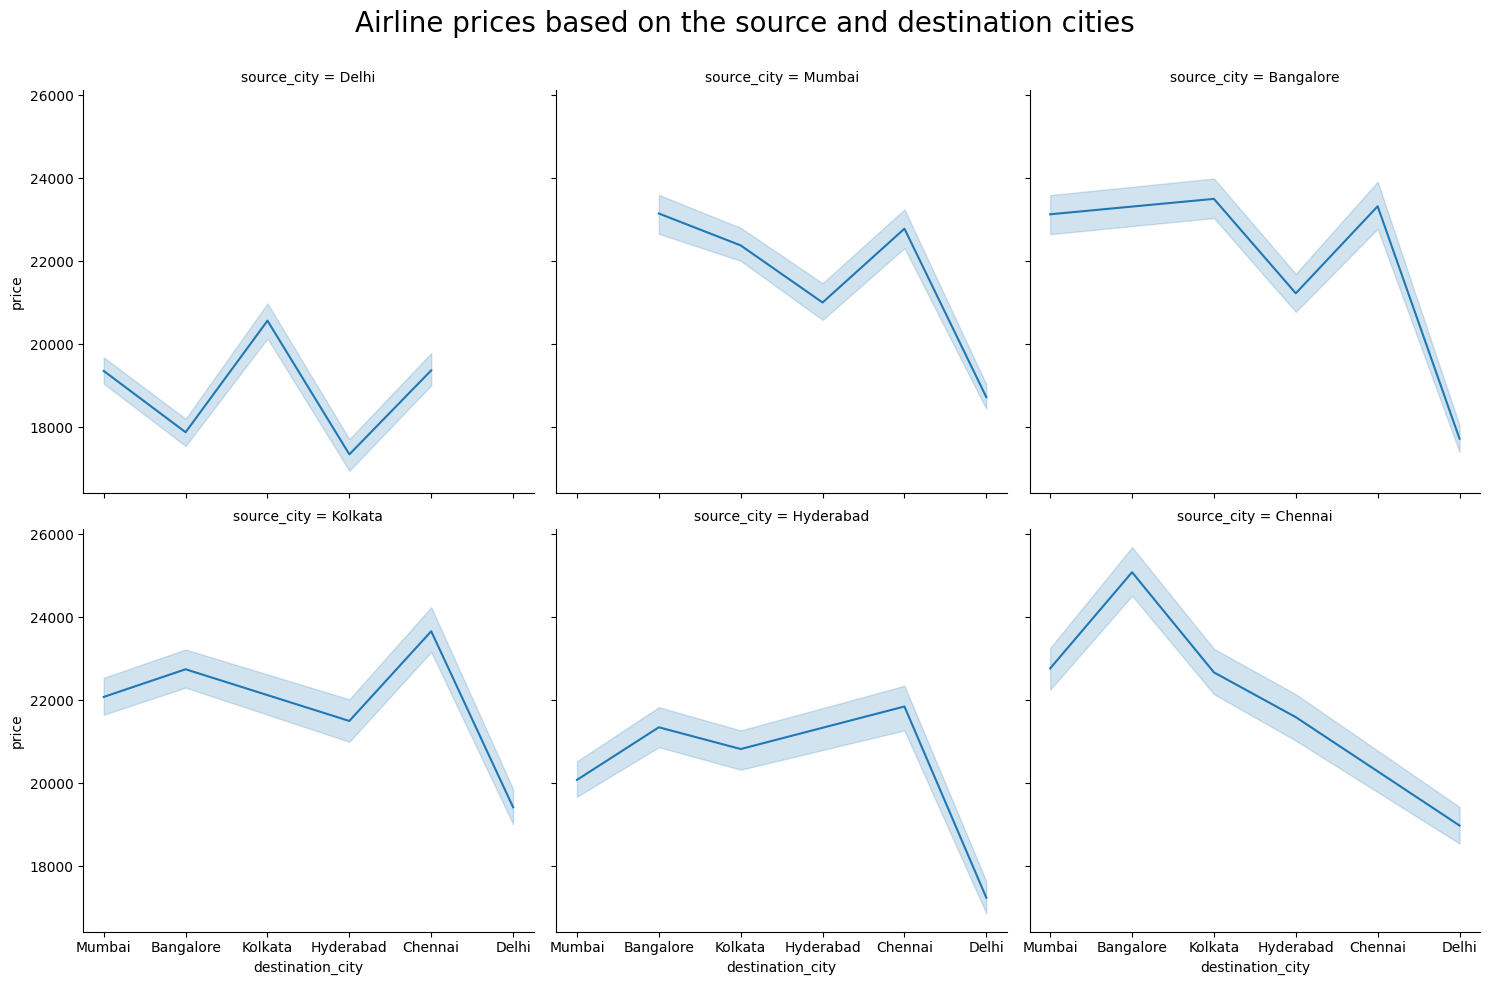

In [101]:
ax = sns.relplot(x = 'destination_city',
            y = 'price',
            data = df,
            kind='line',
            col='source_city',
            col_wrap=3
            )
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

**Findings:** From this Graph, it implis that flight leaving and arriving at delhi are often cheaper whereas flights arriving and leaving at bangalore are the high priced.

### Q5: How does the ticket price vary with the number of stops of a Flight?

<Axes: title={'center': 'Airline price based on the number of stops in Business'}, xlabel='airline', ylabel='price'>

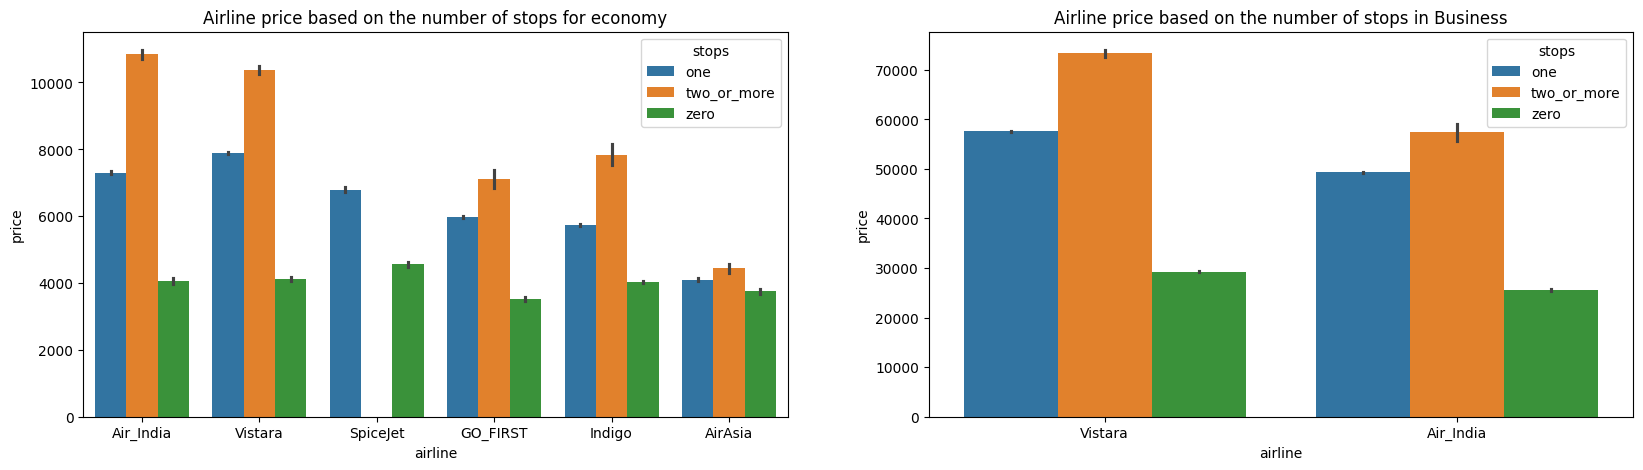

In [102]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Airline price based on the number of stops for economy")
sns.barplot(x = 'airline',
            y = 'price',
            data = df[df["class"] == 'Economy'].sort_values("price", ascending=False),
            hue = 'stops')

plt.subplot(1,2,2)
plt.title('Airline price based on the number of stops in Business')
sns.barplot(x = "airline",
            y = "price",
            data = df[df["class"] == "Business"].sort_values("price", ascending=False),
            hue = 'stops')

**Findingd:** Flight cost increases with most stops. But airasia appears to be having stable price.
The unique Behaviour of AirAsia suggests that it operates as low-cost airline company

### Check Skewness of the data

In [103]:
select_skew = df[['duration', 'days_left', 'price']]
select_skew.skew()

duration     0.602899
days_left   -0.035464
price        1.061377
dtype: float64

Text(0.5, 1.0, 'Price')

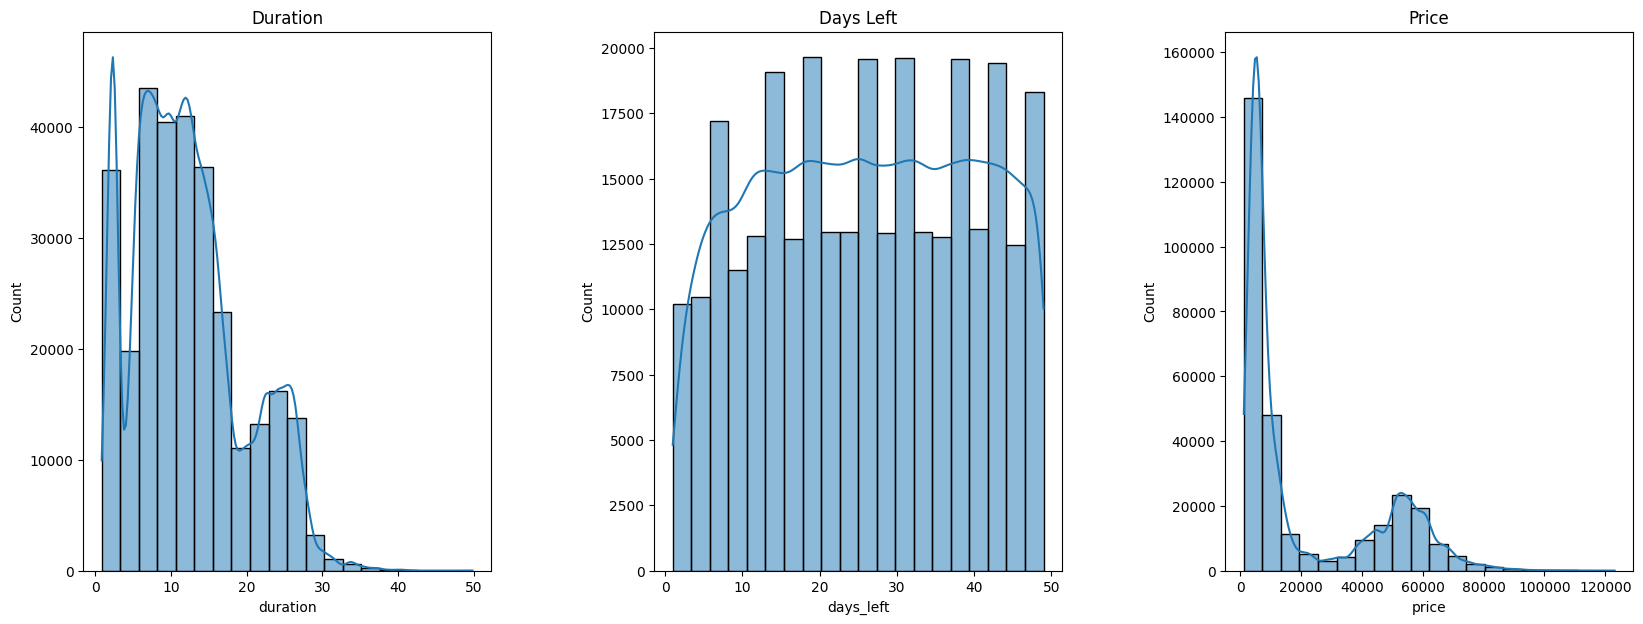

In [104]:
plt.figure(figsize=(20, 7))

plt.subplots_adjust(wspace=0.4)


# Subplot 1
plt.subplot(1, 3, 1)
sns.histplot(data=df['duration'], bins = 20, kde=True)
plt.title("Duration")

# Subplot 2
plt.subplot(1, 3, 2)
sns.histplot(data=df['days_left'], bins = 20, kde=True)
plt.title("Days Left")

# Subplot 3
plt.subplot(1, 3, 3)
sns.histplot(data=df['price'], bins= 20, kde=True)
plt.title("Price")

**Findings:** The above skewness values provide insights into the shape of the data distributions: 'duration' and 'price' exhibit right-skewed or positive skewed distributions, with longer tails on the right and data concentrated on the left. 'days_Left' has a skewness value close to zero, indicating a nearly symmetric distribution, which means the data is relatively balanced without strong skewness in either direction.

In [105]:
select_kurtosis = df[['duration','days_left', 'price']]
select_kurtosis.kurtosis()

duration    -0.268996
days_left   -1.156215
price       -0.396293
dtype: float64

**Findings:**
* The above kurtosis values indicates that the data distributio of three variables are characterized by negative kurtosis values, indicating platykurtic values.
* THis means the distribution have lighter tails and less peaked compared to standard normal distribution.
* Consequently, there are less outliers and data tends to be more evenly distributed around mean.

### Visualization of numerical features with boxplot and histogram to check the outliers and skewness

<Axes: xlabel='price', ylabel='Count'>

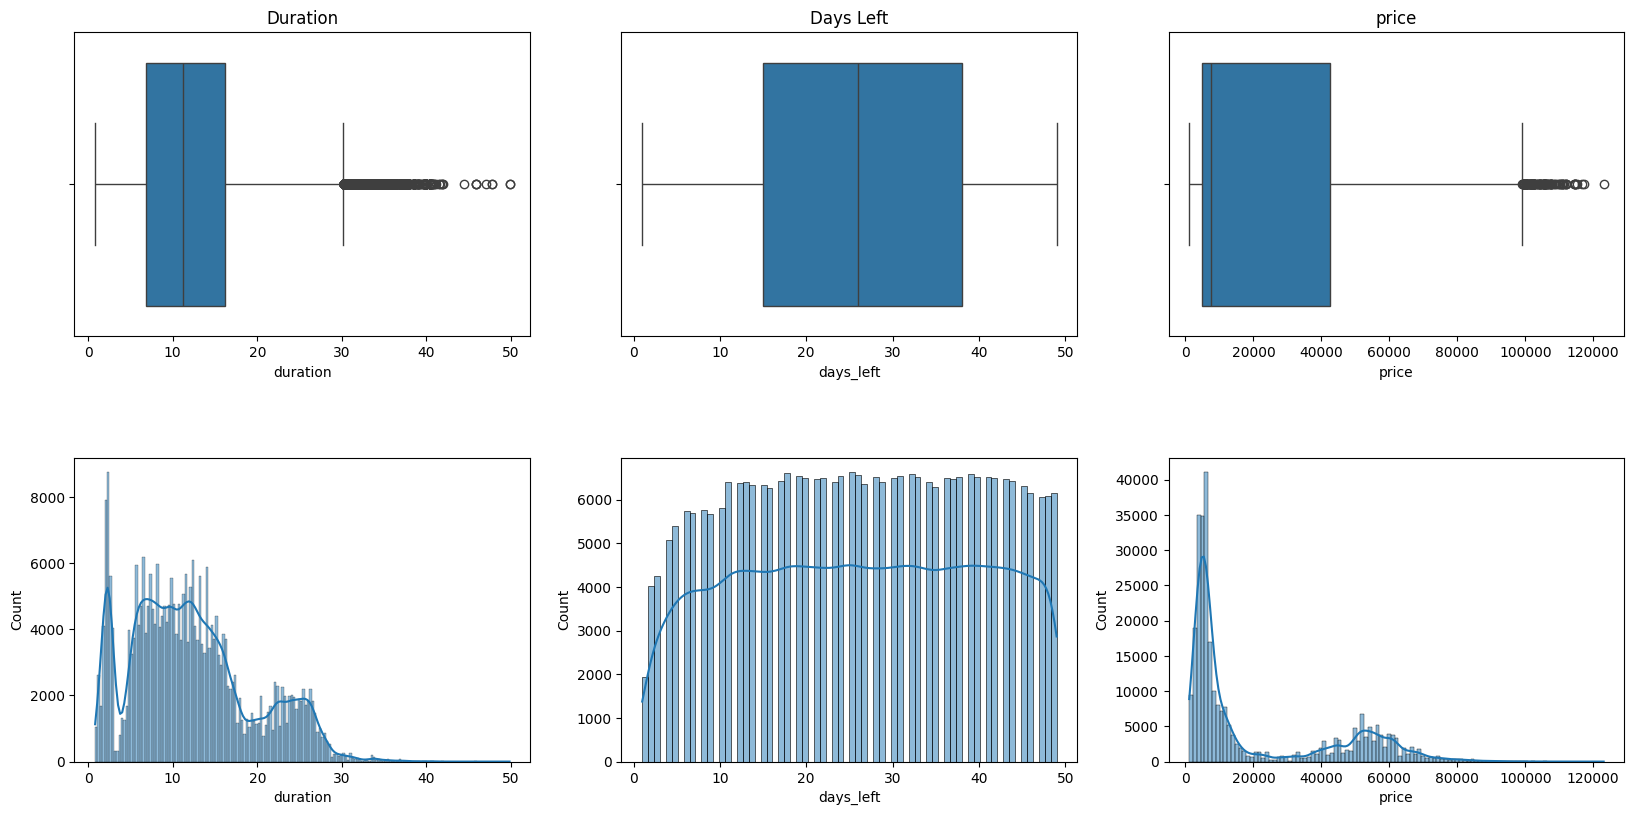

In [106]:
# Create figure with subplot
plt.figure(figsize=(20, 15))

# Create a grid for subplot
grid = plt.GridSpec(3, 3, hspace=0.4)

# subplot 1: Box plot and Skewness plot for Duration
plt.subplot(grid[0,0])
sns.boxplot(x = df['duration'])
plt.title("Duration")

plt.subplot(grid[1,0])
sns.histplot(x = df['duration'], kde=True)

# Subplot 2: Box plot and skewness plot for days_left
plt.subplot(grid[0,1])
plt.title("Days Left")
sns.boxplot(x=df['days_left'])

plt.subplot(grid[1,1])
sns.histplot(x=df['days_left'], kde=True)

# Subplot 3: Box Plot and SKewness Plot for Price
plt.subplot(grid[0,2])
plt.title("price")
sns.boxplot(x = df['price'])

plt.subplot(grid[1,2])
sns.histplot(x = df['price'], kde=True)




**Findings:** 
* based on the plot shown, it's evident that the target variable 'price' exhibits a positive skewed, primarly driven by 'Business Class'.
* Moreover, we're retaining the outlier values in the target variable 'price' because they are primarly influenced by class features.
* Skewness in 'duration' variable is affected by the number of stops, which includes 'zero', 'one', 'two'.

### Shapiro-Wilk Test (Statistical Normality Test)
The Shapiro-Wilk test is a statistical test used to assess whether a given sample comes from a normally distributed population. It is one of the most powerful tests for normality, especially for small to moderately sized samples.

In [107]:
# This line sets the seed for the random number to regenerate the same result again.
np.random.seed(1) 

# Create object of Shapiro, to perform shapiro Wilk test on the 'price' column of the dataframe.
# The object returns stats and p-value.
stats, p = shapiro(df['price'])
print("Stats Value: ", stats, "P-Value: ", p)

Stats Value:  0.7520069179566352 P-Value:  5.679609671657394e-164


C:\Users\HP\AppData\Local\Temp\ipykernel_30364\3151559760.py:6: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 300153.
  stats, p = shapiro(df['price'])


In [108]:
alpha = 0.05

if p < alpha:
    print("THe data does not follows normal distribution (Reject Null Hypothesis)")
else:
    print("The data follows normal distribution (Fail to reject the null hypothesys)")

THe data does not follows normal distribution (Reject Null Hypothesis)


# Data Transformation

In [109]:
# Use Label Encode class to encode categorical values into numerical one 
# Create object of LabelEncoder 
le = LabelEncoder()

In [110]:
categorical_col

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [111]:
numerical_col

Index(['duration', 'days_left', 'price'], dtype='object')

In [112]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [113]:
# copy dataframe
df_copy = df.copy()

In [114]:
# Apply label encoder to specific columns
df_copy[categorical_col] = df_copy[categorical_col].apply(le.fit_transform)

In [115]:
df_copy.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [116]:
# print the encoded values
for col in categorical_col:
    print(col, df[col].unique(), df_copy[col].unique())

airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] [4 0 5 2 3 1]
flight ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] [1408 1387 1213 ...  558  587  718]
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] [2 5 0 4 3 1]
departure_time ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] [2 1 4 0 5 3]
stops ['zero' 'one' 'two_or_more'] [2 0 1]
arrival_time ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] [5 4 1 0 2 3]
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] [5 0 4 3 1 2]
class ['Economy' 'Business'] [1 0]


In [40]:
df_copy.dtypes

airline               int32
flight                int32
source_city           int32
departure_time        int32
stops                 int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object

# Feature Selection

<Axes: >

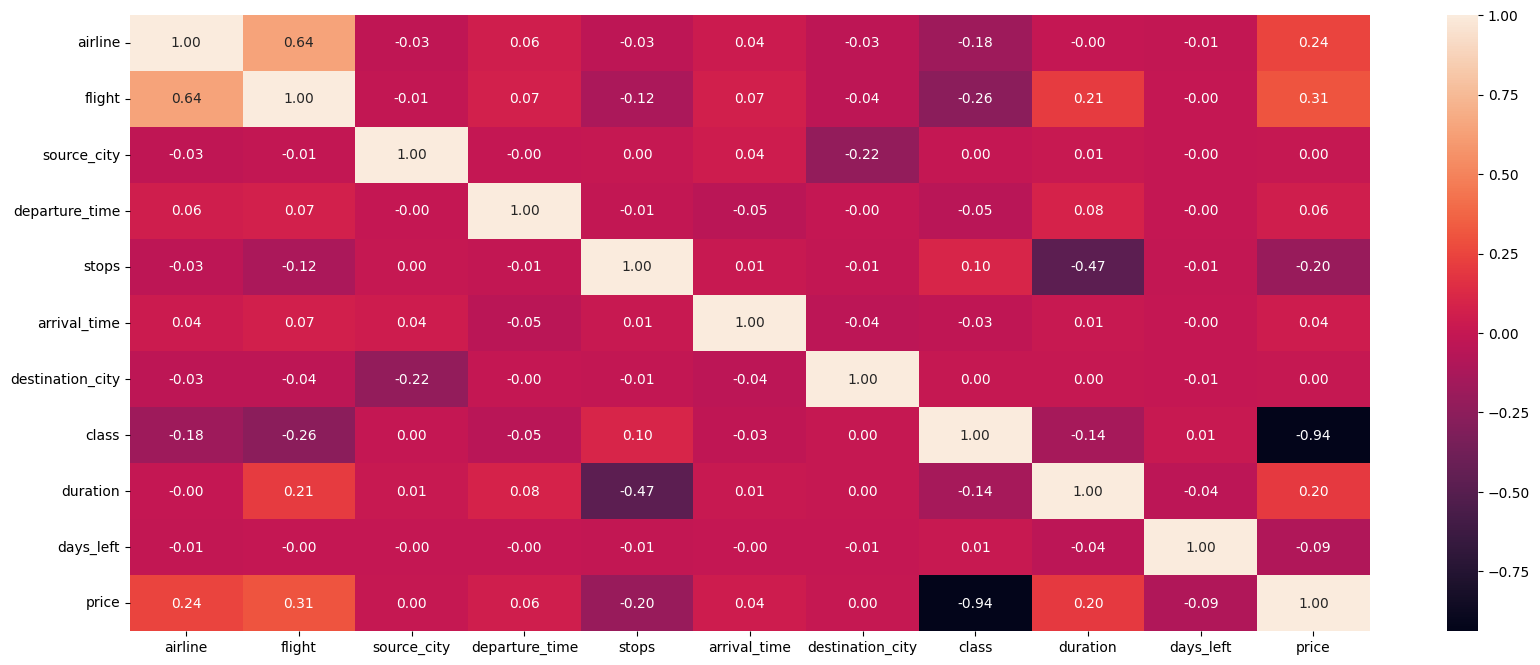

In [41]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_copy.corr(), annot=True, fmt = '.2f')

**Findings:** 
* Based on the heatmap above, it's evident that there is a strong correlation between the 'flight' and 'airline' variables.
* In many cases, it's beneficial to remove highly correlated independent variables from your dataset when building a machine learning model. These highly correlated features, often referred to as multicollinearity, can introduce challenges in model training and interpretation. 
* As a result, we've decided to drop the 'flight' column from our dataset. While 'airline' has a slightly lower correlation with the target variable 'price,' we've still chosen to eliminate 'flight' to simplify the input data for the model implementaion. 
* Furthermore, it's worth noting that the independent variables 'source_city' and 'destination_city' exhibit zero correlation with the target variable 'Price.' 
* However, we've retained them in our dataset to explore the usability of other feature selection methods.

In [42]:
df_copy.drop('flight', axis=1, inplace=True)

### Using Filter-based Method: Univariate Selection using Statestical test F-Statestics (ANOVA)

Since we have mostly categorical input variables and continous Target variables, we are using ANOVA and selected the 6 most important features.  

* F_regression: Its a scoring function to evaluate relationship between features and target variables.
* SelectKBest: t calculates the F-statistic and corresponding p-values for each feature with respect to the target variable and then selects the top k features based on their scores.

In [43]:
# To perform selection with the F-Statestics (ANOVA) method, we will use the f_regression function from sklearn. 
# Spliting data into features(X) and target(y) variables
y = df_copy['price']
x = df_copy.drop('price', axis=1)

In [44]:
# Feature Selection using F-Statestics (ANOVA)
num_features_to_select = 6 # Number of features to select

select_features = SelectKBest(f_regression, 
                              k=num_features_to_select).fit(x, y)

In [45]:
# Get the indices of the selected features 
select_features_indices = select_features.get_support(indices=True)

In [46]:
select_features_indices

array([0, 2, 3, 6, 7, 8], dtype=int64)

In [47]:
# Display the selected features and their indices 
selected_features_names = x.columns[select_features_indices]
print("selected features: ", selected_features_names)

selected features:  Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'], dtype='object')


In [48]:
x[selected_features_names].head()

,airline,departure_time,stops,class,duration,days_left
0,4,2,2,1,2.17,1
1,4,1,2,1,2.33,1
2,0,1,2,1,2.17,1
3,5,4,2,1,2.25,1
4,5,4,2,1,2.33,1


**Findings:**
* By employing a filter-based selection method, we successfully identified the six most important features through F-statestics (ANOVA) analysis.
* This Featues are airline,  departure_time, stops, class, duration, days_left.
* Next, we will drop th unselected features from our dataframe

In [49]:
# filter the features that we need to remove from dataframe 
features_to_drop = [col for col in df_copy.columns if col not in selected_features_names and col != 'price']

# Drop the features that are not required 
df_copy.drop(features_to_drop, axis=1, inplace=True)


In [50]:
df_copy.head()

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,2.17,1,5953
1,4,1,2,1,2.33,1,5953
2,0,1,2,1,2.17,1,5956
3,5,4,2,1,2.25,1,5955
4,5,4,2,1,2.33,1,5955


### Scaling of Variables: Min-Max Normalization

In [51]:
new_min = 0
new_max = 1 # Set your desired max value

duration_min = df_copy['duration'].min()
duration_max = df_copy['duration'].max()
days_left_min = df_copy['days_left'].min()
days_left_max = df_copy['days_left'].max()
price_min = df_copy['price'].min()
price_max = df_copy['price'].max()
# FOr later use

In [52]:
# Scaling Categorical Variables

cat_scaler = MinMaxScaler(feature_range=(new_min, new_max))

scale_col = df_copy.columns

scaled_df = cat_scaler.fit_transform(df_copy)



In [53]:
scaled_df = pd.DataFrame(scaled_df, columns=scale_col)

scaled_df.head()

,airline,departure_time,stops,class,duration,days_left,price
0,0.8,0.4,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.2,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.8,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765


In [54]:
df_copy.head()

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,2.17,1,5953
1,4,1,2,1,2.33,1,5953
2,0,1,2,1,2.17,1,5956
3,5,4,2,1,2.25,1,5955
4,5,4,2,1,2.33,1,5955


Scaling categorical variables does not impact the performance of model accuracy. Therefore, only the numerical variables are being scaled.

In [55]:
# Create minmax sclaer with custom features_range

num_scaler = MinMaxScaler(feature_range=(new_min, new_max))

# List of numerical column to scale 
num_col = ['duration', 'days_left', 'price']

# Apply min-max scaling to the specified columns in df 
df_copy[num_col] = num_scaler.fit_transform(df_copy[num_col])

In [56]:
df_copy.head()

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,0.027347,0.0,0.039749
1,4,1,2,1,0.030612,0.0,0.039749
2,0,1,2,1,0.027347,0.0,0.039773
3,5,4,2,1,0.028980,0.0,0.039765
4,5,4,2,1,0.030612,0.0,0.039765


In [78]:
df_copy.stops.unique()

array([2, 0, 1])

# Modeling

In [57]:
# Sepeerate Features and Target variables
X = df_copy.drop('price', axis=1)
y = df_copy['price']

In [58]:
# Split the data into Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## Model 1: Linear Regression

In [59]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)   # Training algorithm

LinearRegression()

In [60]:
# Predict the values 
Y_pred = lrm.predict(X_test)

In [61]:
# retrive intercept
print(lrm.intercept_)

0.4145379627444743


In [62]:
# retrive slope
print(lrm.coef_)

[ 7.83057566e-03  2.45795664e-04 -2.68012250e-02 -3.65074224e-01
  3.74131327e-02 -5.18990040e-02]


<Axes: ylabel='price'>

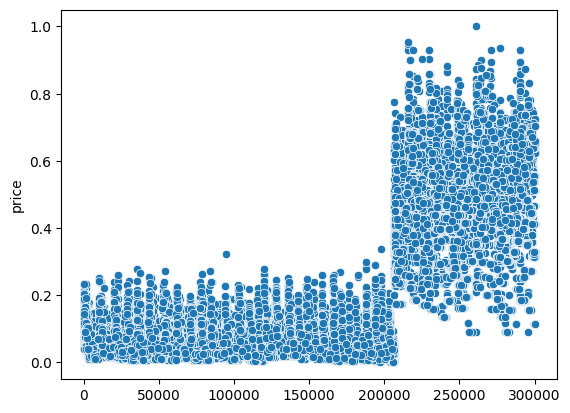

In [63]:
sns.scatterplot(y_train)
# sns.lineplot

In [64]:
# Create dataframe and visualize
df_lrm = pd.DataFrame({"Actual": y_test.to_numpy().flatten(),
                       "Predict": Y_pred.flatten()})

In [65]:
df_lrm.head()

,Actual,Predict
0,0.039618,0.069986
1,0.487046,0.428882
2,0.058697,0.045530
3,0.426734,0.383755
4,0.039757,0.055393


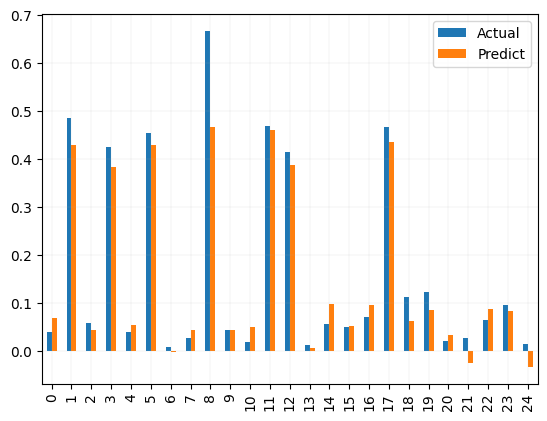

In [66]:
sample_df = df_lrm.head(25)
sample_df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')

<Axes: ylabel='Actual'>

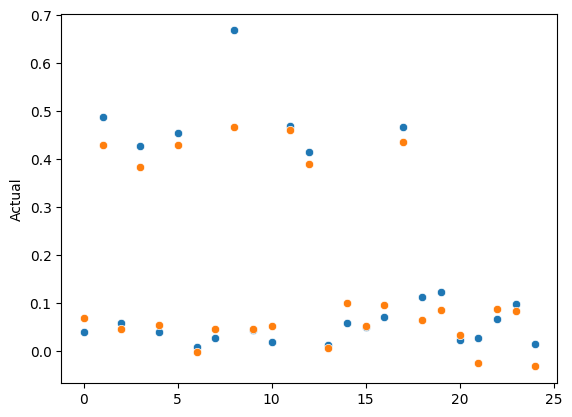

In [67]:
# Check the acutal and predicted values 
sns.scatterplot(sample_df['Actual'])
sns.scatterplot(sample_df['Predict'])

In [69]:
# To determine how well the model makes prediction 

# Mean Squared Error
MSE_LR = mean_squared_error(y_test, Y_pred)
print("MSE: ", MSE_LR)

# Root Mean Square Error
RMSE = np.sqrt(MSE_LR)
print("RMSE: ", RMSE)

# Mean Absolute Error
MAE_LR = mean_absolute_error(y_test, Y_pred)
print("MAE: ", MAE_LR)

# R2 Score
R2_LR = r2_score(y_test, Y_pred)
print("R2 Score: ", r2_score(y_test, Y_pred))


MSE:  0.0033074153406008034
RMSE:  0.0575101325037667
MAE:  0.037953365002512326
R2 Score:  0.9048313867182601


# Testing Out Multiple models

In [70]:
X_train.head()

,airline,departure_time,stops,class,duration,days_left
198583,3,0,2,1,0.030612,0.208333
50502,1,0,0,1,0.273878,0.770833
2232,5,0,0,1,0.115714,0.250000
124463,4,0,0,1,0.078367,0.625000
282144,5,4,0,0,0.275510,0.708333


In [71]:
y_train.head()

198583    0.032279
50502     0.061107
2232      0.090558
124463    0.063936
282144    0.303314
Name: price, dtype: float64

In [72]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

models = {
                'LinearRegression': LinearRegression(),
                'Lasso': Lasso(),
                'Ridge': Ridge(),
                'ElasticNet':ElasticNet()
            }



In [73]:
report = {}

for i in range(len(models)):
    model = list(models.values())[i]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    test_model_score = r2_score(y_test, y_pred)

    report[list(models.keys())[i]] = test_model_score

In [74]:
best_model_score = max(sorted(report.values()))

best_model_name = list(report.keys())[list(report.values()).index(best_model_score)]

best_model = models[best_model_name]

print(f"Best model found, Model Name: {best_model_name}, R2_Score: {best_model_score}")

Best model found, Model Name: LinearRegression, R2_Score: 0.9048313867182601


In [75]:
report

{'LinearRegression': 0.9048313867182601,
 'Lasso': -1.0790578801156414e-05,
 'Ridge': 0.9048312408998712,
 'ElasticNet': -1.0790578801156414e-05}

In [76]:
X_train.columns

Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'], dtype='object')

In [77]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')